# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd

# Number of training examples
n_train = len(y_train)

# Number of validation examples
n_validation = len(y_valid)

# Number of testing examples.
n_test = len(y_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Representation of labels in the training dataset:
 0:  180    1: 1980    2: 2010    3: 1260    4: 1770    5: 1650    6:  360    7: 1290    8: 1260    9: 1320
10: 1800   11: 1170   12: 1890   13: 1920   14:  690   15:  540   16:  360   17:  990   18: 1080   19:  180
20:  300   21:  270   22:  330   23:  450   24:  240   25: 1350   26:  540   27:  210   28:  480   29:  240
30:  390   31:  690   32:  210   33:  599   34:  360   35: 1080   36:  330   37:  180   38: 1860   39:  270
40:  300   41:  210   42:  210   

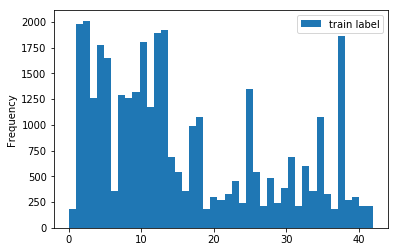

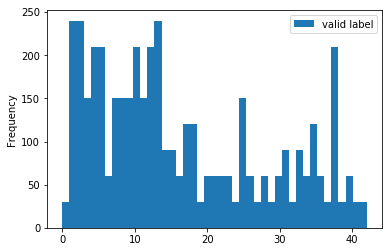

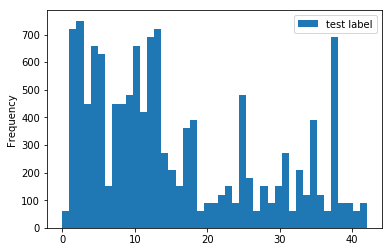

In [4]:
### Data exploration visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random

def plot_histogram(y_data, labelstr):
    label_data  = ({labelstr : list(y_data)})
    df = pd.DataFrame(data=label_data)
    df.plot.hist(bins = n_classes)

label_counts = []

def print_labels(ys):
    for i in range(n_classes):
        label_count = np.count_nonzero(ys == i)
        if i % 10 == 9:
            end = '\n'
        else:
            end = '   '
        print('{:>2}: {:>4}'.format(i, label_count), end=end)
        label_counts.append(label_count)
    
print('Representation of labels in the training dataset:')
print_labels(y_train)
plot_histogram(y_train, 'train label')
plot_histogram(y_valid, 'valid label')
plot_histogram(y_test, 'test label')

One image for each label in the training data set just to see what they look like:


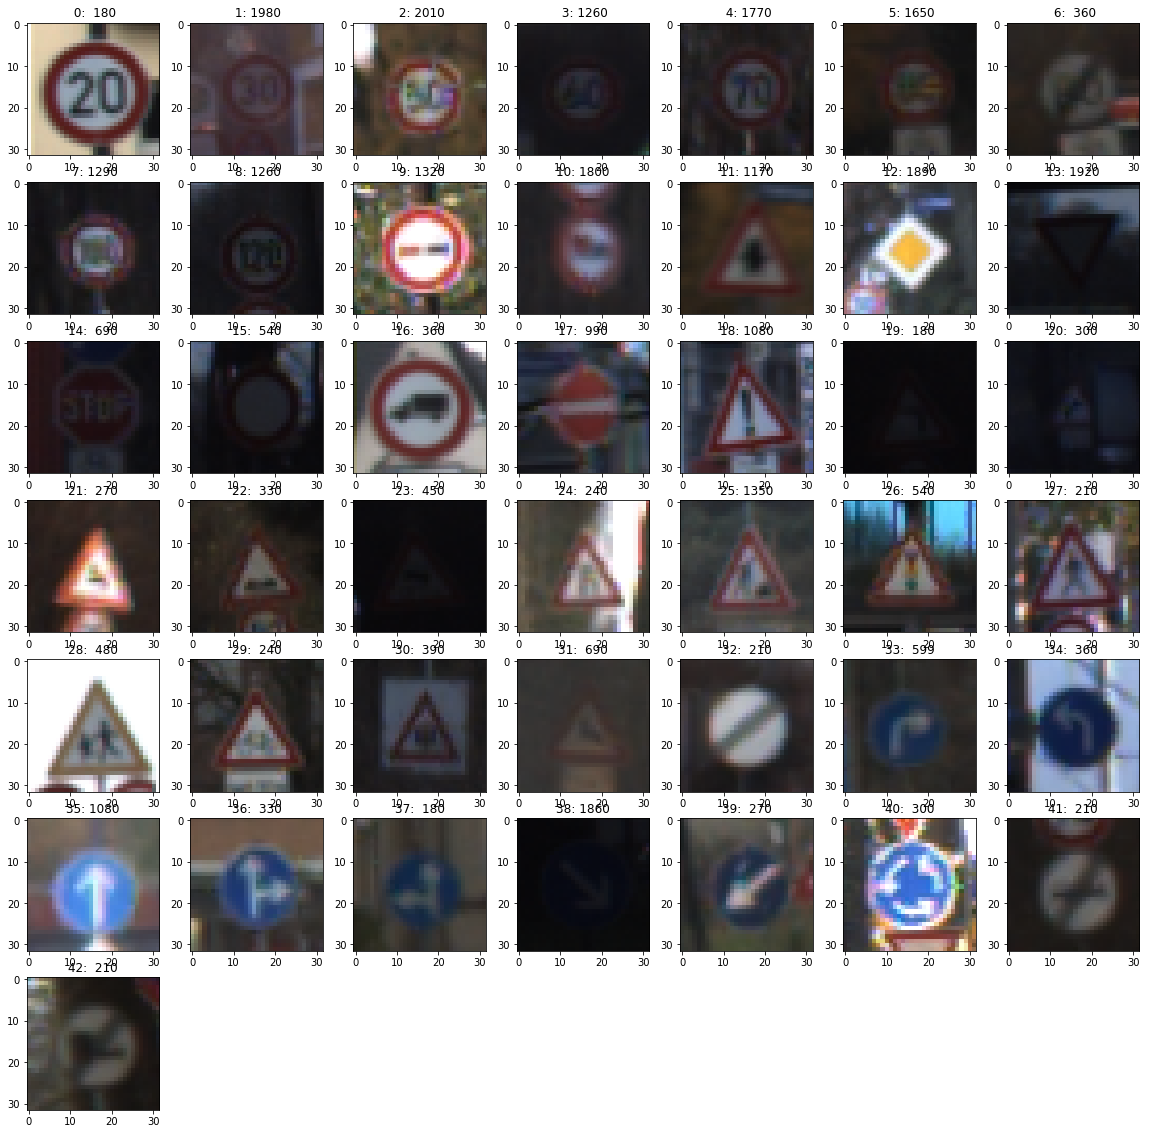

In [5]:
print('One image for each label in the training data set just to see what they look like:')
images = []
for yi in range(n_classes):
    for xi in range(n_train):
        if y_train[xi] == yi:
            images.append(X_train[xi].squeeze())
            break
plt.figure(figsize=(20,20))
columns = 7
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.title('{:>2}: {:>4}'.format(i, label_counts[i]))
    plt.imshow(image)    

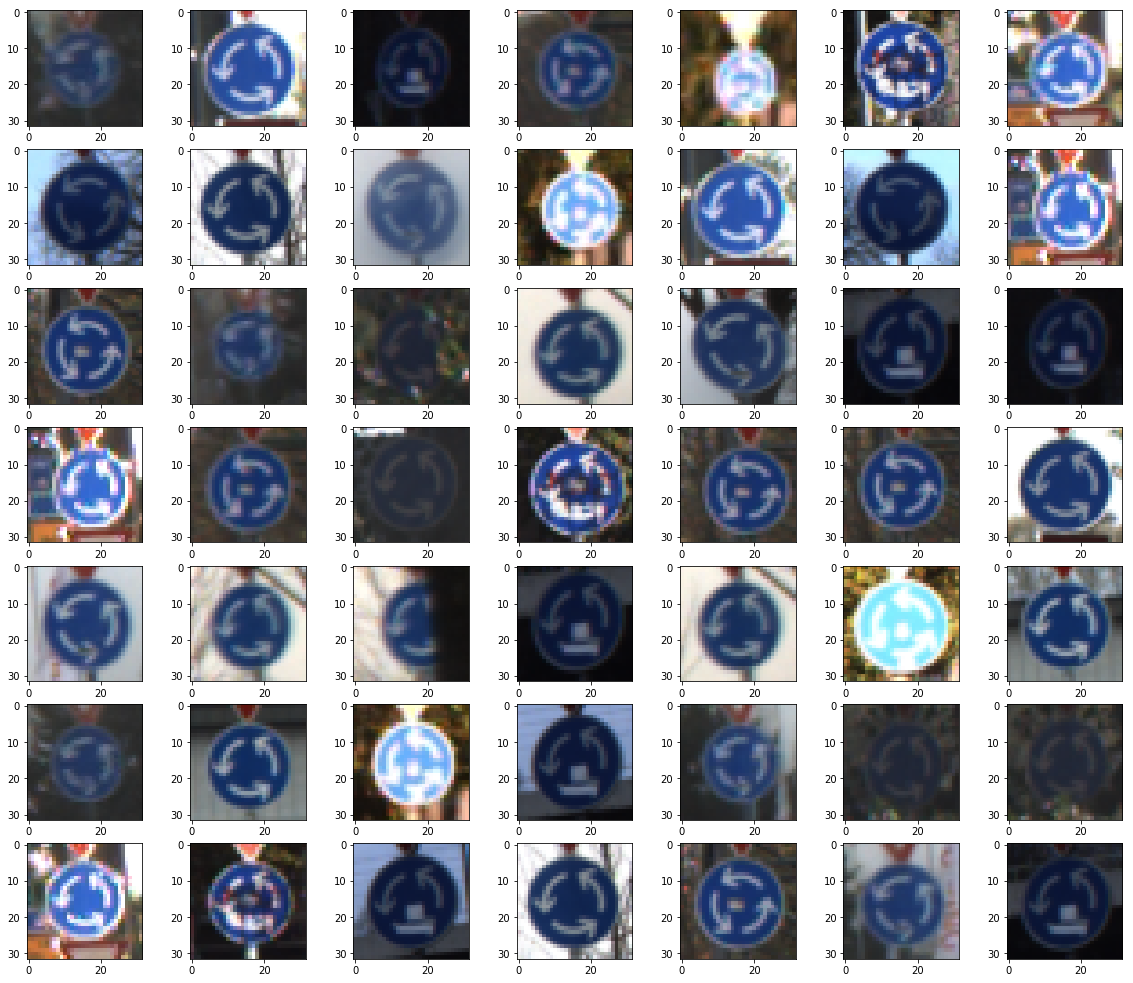

In [6]:
### This code cell can be skipped
### I use this code cell to have a look at a number of images of a label of interest at once
import cv2

label_of_interest = 40 # 40: "Roundabout mandatory"

images = []
for xi in range(n_train):
    if y_train[xi] == label_of_interest:
        images.append(X_train[xi].squeeze())
        
plt.figure(figsize=(20,20))
for i in range(49):
    index = random.randint(0, len(images)-1)
    image = images[index]
    plt.subplot(8, 7, i + 1)
    plt.imshow(image)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
# Generate fake data
#
# Flipping images horizontally
#
# 19,Dangerous curve to the left (180) <->  20,Dangerous curve to the right (300) 480
# 33,Turn right ahead            (599) <->  34,Turn left ahead              (360) 959
# 36,Go straight or right        (330) <->  37,Go straight or left          (180) 510
# 38,Keep right                 (1860) <->  39,Keep left                    (270) 2130
#
# 11,Right-of-way at the next intersection (1170)
# 12,Priority road                         (1890)
# 17,No entry                               (990)
# 18,General caution                       (1080)
# 22,Bumpy road                             (330)
# 26,Traffic signals                        (540)
# 30,Beware of ice/snow                     (390)
# 35,Ahead only                            (1080)
#
# Flipping images vertically - TODO
#
# 1,Speed limit (30km/h) 1980
# 5,Speed limit (80km/h) 1650
#
# Rotating by 180 degrees
#
# 32,End of all speed and passing limits (210)
# 40,Roundabout mandatory (300) - Sometimes it is installed upside down (not sure which one is the official if there is one)
#
# Rotating by 120 degrees (twice!)
#
# 40,Roundabout mandatory (300)

import cv2

# Each label should have at least this many images in the training data
target_img_num = 1800

# Labels to fliplr : the new label after fliplr
fliplr_labels = {
    11: 11,
    12: 12,
    17: 17,
    18: 18,
    19: 20,
    20: 19,
    22: 22,
    26: 26,
    30: 30,
    35: 35,
    33: 34,
    34: 33,
    36: 37,
    37: 36,
    38: 39,
    39: 38,
}

flipud_labels = {
    1: 1,
    5: 5,
}

rot180_labels = {
    32: 32,
    40: 40,
}

curr_image_count = {}
for y in range(n_classes):
    curr_image_count[y] = np.count_nonzero(y_train == y)

# Calculate the number of fake images to be generated
new_img_num = 0
for y in range(n_classes):
    fy = y
    if y in fliplr_labels:
        fy = fliplr_labels[y]
    if curr_image_count[fy] < target_img_num:
        needed_num = (target_img_num - curr_image_count[fy])
        fake_num = 0
        if y in fliplr_labels:
            fake_num += curr_image_count[y]
        if y in flipud_labels:
            fake_num += curr_image_count[y]
        if y in rot180_labels:
            fake_num += curr_image_count[y]
        if y == 40:
            fake_num += curr_image_count[y] * 2
        new_img_num += min(fake_num, needed_num)

print('Generating {} fake images... '.format(new_img_num), end='')

# Generate the fake images
fakes = np.zeros((new_img_num, 32, 32, 3), dtype='uint8')
fakes_y = np.zeros((new_img_num,), dtype='uint8')
fakes_index = 0

# Go through the training set images an generate fake images from them if possible
for i in range(n_train):
    
    # Get the original label
    y = y_train[i]
    
    # Check if we already have at least the target number of images for the label
    # Special handling for images flipped horizontally - the generated fake may have another label
    fy = y
    if y in fliplr_labels:
        fy = fliplr_labels[y]
    if curr_image_count[fy] >= target_img_num:
        # We alreay have, skip this one and have a look at the next one
        continue

    if y in fliplr_labels:
        # Get the original image from the training set
        image = X_train[i].squeeze()
        # Flip the image horizontally
        fakes[fakes_index,...] = np.fliplr(image)
        # Set the new label
        fakes_y[fakes_index,...] = fy
        # We added a fake image, so increase the index in the array of fake images
        fakes_index += 1
        # Increase the image count for the label
        curr_image_count[fy] += 1

    if y in flipud_labels:
        # Get the original image from the training set
        image = X_train[i].squeeze()
        # Flip the image horizontally
        fakes[fakes_index,...] = np.flipud(image)
        # Set the new label
        fakes_y[fakes_index,...] = y
        # We added a fake image, so increase the index in the array of fake images
        fakes_index += 1
        # Increase the image count for the label
        curr_image_count[y] += 1

    if y in rot180_labels:
        # Get the original image from the training set
        image = X_train[i].squeeze()
        # Rotate the image by 180 degrees (2x90degrees with numpy)
        fakes[fakes_index,...] = np.rot90(image, 2)
        # Set the label of the fake image - it is actually the same as that of the original
        fakes_y[fakes_index,...] = rot180_labels[y]
        # We added a fake image, so increase the index in the array of fake images
        fakes_index += 1
        # Increase the image count for the label
        curr_image_count[y] += 1
        
    if y == 40: # Roundabout mandatory
        if curr_image_count[y] >= target_img_num:
            continue

        # Get the original image from the training set
        image = X_train[i].squeeze()
        
        # Get the rotation matrix for the 120 degrees rotation of the image around the image center
        rot_mtx = cv2.getRotationMatrix2D((15,15), 120, 1)
        # Rotate the image by 120 degrees
        rot120 = cv2.warpAffine(image, rot_mtx, (32,32), flags=cv2.INTER_LINEAR)
        fakes[fakes_index,...] = rot120
        fakes_y[fakes_index,...] = y
        # We added a fake image, so increase the index in the array of fake images
        fakes_index += 1
        # Increase the image count for the label
        curr_image_count[y] += 1
        
        if curr_image_count[y] >= target_img_num:
            continue

        # Get the rotation matrix for the 240 degrees rotation of the image around the image center
        rot_mtx = cv2.getRotationMatrix2D((15,15), 240, 1)
        # Rotate the image by 240 degrees
        rot240 = cv2.warpAffine(image, rot_mtx, (32,32), flags=cv2.INTER_LINEAR)
        fakes[fakes_index,...] = rot240
        fakes_y[fakes_index,...] = y
        # We added a fake image, so increase the index in the array of fake images
        fakes_index += 1
        # Increase the image count for the label
        curr_image_count[y] += 1
        
print('Done.')

assert(fakes_index == new_img_num)

Generating 8879 fake images... Done.


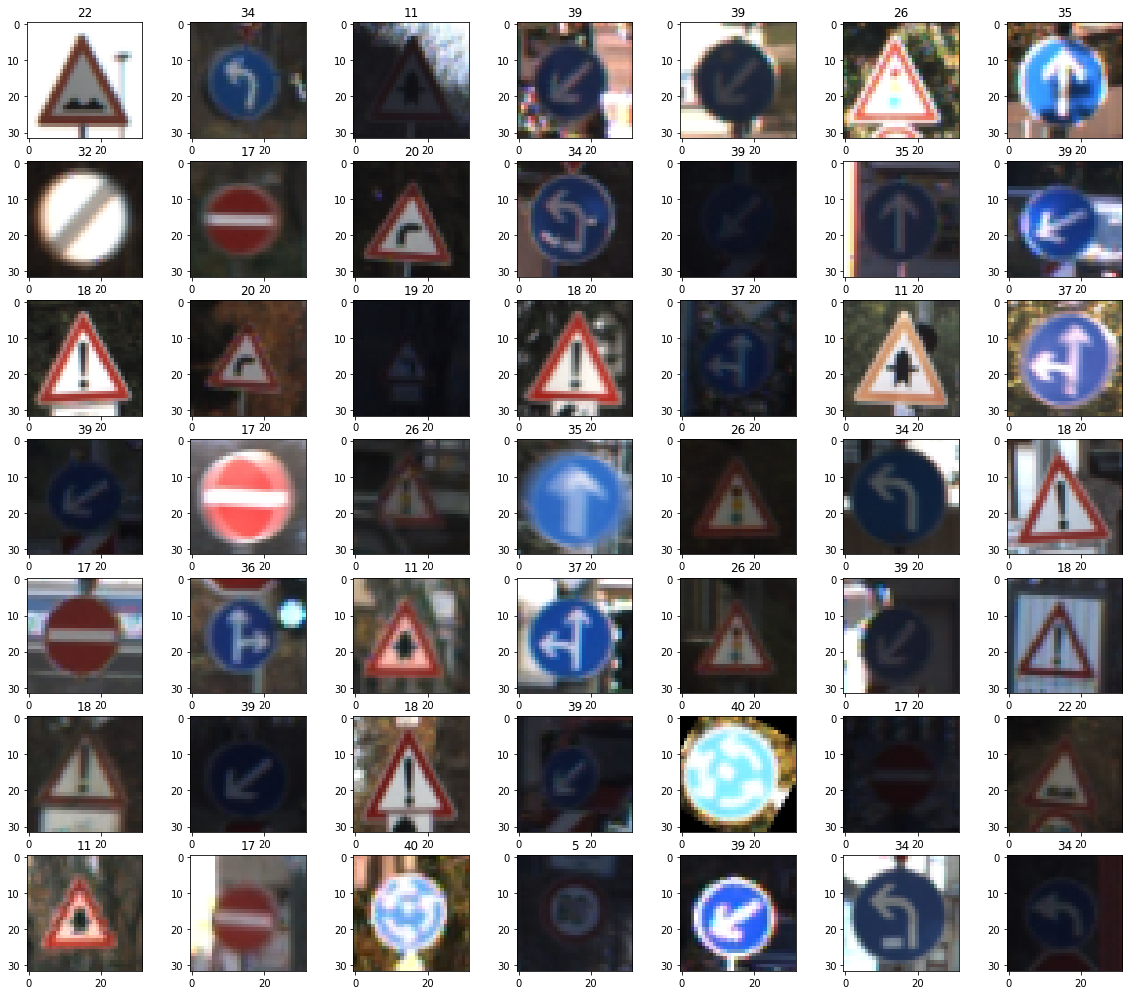

In [8]:
# This code cell can be skipped
# Pick and show some of the generated images
plt.figure(figsize=(20,20))
for i in range(49):
    index = random.randint(0, len(fakes)-1)
    image = fakes[index].squeeze()
    plt.subplot(8, 7, i + 1)
    plt.title('{}'.format(fakes_y[index]))
    plt.imshow(image)

Total number of images in the training set: 43678


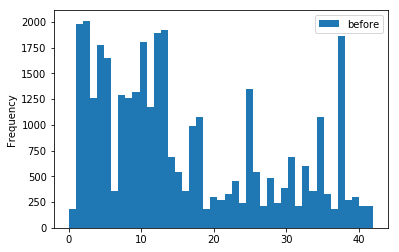

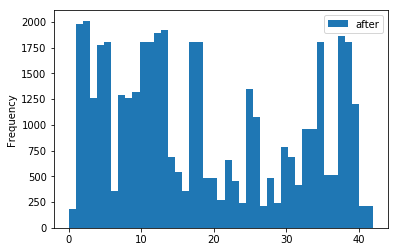

In [9]:
# Augment the training set with the generated images
X_train = np.append(X_train, fakes, axis=0)

plot_histogram(y_train, 'before')
y_train = np.append(y_train, fakes_y)

n_train = len(y_train)
print('Total number of images in the training set: {}'.format(n_train))
plot_histogram(y_train, 'after')

Generating 34382 fake images... Done.
image 4017's label: 26
image 8563's label: 3
image 20648's label: 6
image 6912's label: 37
image 4323's label: 23


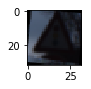

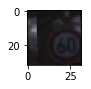

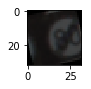

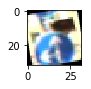

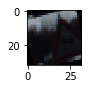

In [10]:
# Generate fake data - for labels with less images than the target number

# Each label should have at least that many images in the training set
target = target_img_num

# Returns a transformed image - applies some random transfomations
def transform(image):
    
    # First, the image is shifted a little in a random direction
    x = random.randint(-8, 8)
    y = random.randint(-8, 8)
    rolled = np.roll(image, x, axis=0)
    rolled = np.roll(rolled, y, axis=1)

    # Then rotated a little in a random angle between -10 and 10 degrees
    angle = random.randint(-15, 15)
    # Get the rotation matrix
    rot_mtx = cv2.getRotationMatrix2D((15,15), angle, 1)
    # Rotate the image
    rotated = cv2.warpAffine(rolled, rot_mtx, (32,32), flags=cv2.INTER_LINEAR)

    return rotated

orig_label_count = {}
label_count = {}
for i in range(n_classes):
    orig_label_count[i] = np.count_nonzero(y_train == i)
    label_count[i] = np.count_nonzero(y_train == i)
    
count = 0
for k, v in label_count.items():
    if target > v:
        count += (target - v)

print('Generating {} fake images...'.format(count), end=' ')

more = np.zeros((count, 32, 32, 3), dtype='uint8')
more_y = np.zeros((count,), dtype='uint8')
index = 0

for i in range(n_train):
    
    y = y_train[i]
    if orig_label_count[y] >= target:
        continue
    
    image = X_train[i].squeeze()
    num_trans = (target - orig_label_count[y]) // orig_label_count[y] + 1
    for j in range(num_trans):
        if index >= count:
            break
        if label_count[y] >= target:
            break
        more[index,...] = transform(image)
        more_y[index] = y
        index += 1
        label_count[y] += 1
        
print('Done.')

assert(index == count)

for i in range(5):
    j = random.randint(0, index-1)
    image = more[j].squeeze()
    plt.figure(figsize=(1, 1))
    plt.imshow(image)
    print('image {}\'s label: {}'.format(j, more_y[j]))


Total number of images in the training set: 78060


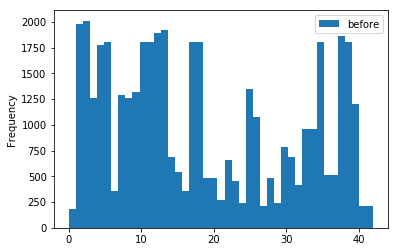

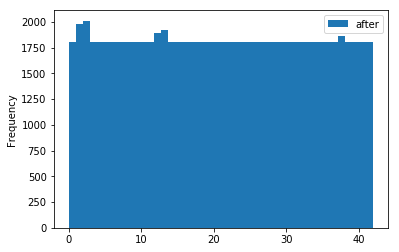

In [11]:
# Augmenting the training set with the generated fake images
X_train = np.append(X_train, more, axis=0)

plot_histogram(y_train, 'before')
y_train = np.append(y_train, more_y)
plot_histogram(y_train, 'after')

n_train = len(y_train)
print('Total number of images in the training set: {}'.format(n_train))

In [12]:
# Convert images to grayscale
import numpy as np
import cv2

# Function to convert the RGB data to grayscale
def rgb2gray(X_data):
    X_gray_data = np.zeros((X_data.shape[0], 32, 32, 1))
    for i in range(len(X_data)):
        image = X_data[i].squeeze()
        X_gray_data[i,...] = np.expand_dims(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), axis=2)
    return X_gray_data



image 62705's label: 8
image 71968's label: 15
image 55537's label: 0


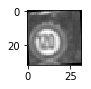

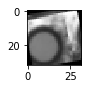

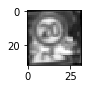

In [13]:
# Convert data to grayscale
X_train = rgb2gray(X_train)
X_valid = rgb2gray(X_valid)

for i in range(3):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()

    plt.figure(figsize=(1, 1))
    plt.imshow(image, cmap='gray')
    print('image {}\'s label: {}'.format(index, y_train[index]))


In [14]:
# Quick way to normalize the data
def normalize_quick(x):
    return (x.astype(float) - 128) / 128

# Normalize the data (mean zero and equal variance)
def normalize(X_data):
    return (X_data - X_data.mean(axis=(0,1,2), keepdims=True)) / X_data.std(axis=(0,1,2), keepdims=True)





In [15]:
print('Normalizing the validation set...', end=' ')
# Normalize the validation data
X_valid = normalize_quick(X_valid)
print('Done.')

print('Normalizing the training set...', end=' ')
# Normalize the training data
X_train = normalize_quick(X_train)
print('Done.')

Normalizing the validation set... Done.
Normalizing the training set... Done.


In [16]:
# Shuffle the training data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [17]:
### Defines the model architecture

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1 (grayscale). Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x24.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 24), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(24))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x24. Output = 5x5x24.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 600.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 600. Output = 220.
    fc1_W  = tf.Variable(tf.truncated_normal(shape=(600, 220), mean = mu, stddev = sigma))
    fc1_b  = tf.Variable(tf.zeros(220))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 220. Output = 128.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(220, 128), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(128))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
   
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 128. Output = 43 (n_classes).
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [18]:
# Set up tf placeholder variables for features and predicted labels
# Initialize the placeholder to have any batch size by using 'None'
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
# One-hot encode the labels
one_hot_y = tf.one_hot(y, n_classes)

In [19]:
# Set up the training pipeline
EPOCHS = 20
BATCH_SIZE = 128

# Learning rate - hyperparameter that tells how quickly the model's weights should be updated
rate = 0.0005

# Pass the input data to the model to calculate the logits
logits = LeNet(x)

# Calculate the cross-entropy that tells how different the logits are from the ground truth training labels
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)

# Average the cross-entropy for the training images
loss_operation = tf.reduce_mean(cross_entropy)

# Use the Adam optimizer (a more sophisticated SGD) to minimize the loss function
# Uses the learning rate hyper-parameter
optimizer = tf.train.AdamOptimizer(learning_rate = rate)

# The optimizer's minimize function uses backpropagation to update the model and minimize the training loss
training_operation = optimizer.minimize(loss_operation)

In [20]:
# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
    


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [21]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = n_train
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.55})
            
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.527
Validation Accuracy = 0.658

EPOCH 2 ...
Training Accuracy = 0.644
Validation Accuracy = 0.805

EPOCH 3 ...
Training Accuracy = 0.717
Validation Accuracy = 0.851

EPOCH 4 ...
Training Accuracy = 0.750
Validation Accuracy = 0.878

EPOCH 5 ...
Training Accuracy = 0.785
Validation Accuracy = 0.892

EPOCH 6 ...
Training Accuracy = 0.803
Validation Accuracy = 0.900

EPOCH 7 ...
Training Accuracy = 0.832
Validation Accuracy = 0.915

EPOCH 8 ...
Training Accuracy = 0.848
Validation Accuracy = 0.922

EPOCH 9 ...
Training Accuracy = 0.864
Validation Accuracy = 0.919

EPOCH 10 ...
Training Accuracy = 0.879
Validation Accuracy = 0.925

EPOCH 11 ...
Training Accuracy = 0.892
Validation Accuracy = 0.931

EPOCH 12 ...
Training Accuracy = 0.895
Validation Accuracy = 0.928

EPOCH 13 ...
Training Accuracy = 0.908
Validation Accuracy = 0.934

EPOCH 14 ...
Training Accuracy = 0.916
Validation Accuracy = 0.935

EPOCH 15 ...
Training Accuracy = 0.919
Valid

In [22]:
### Test the model - evaluate the test data

# Pre-process the test data
X_test = rgb2gray(X_test)
X_test = normalize_quick(X_test)

In [23]:
with tf.Session() as sess:
    # Load the model
    saver.restore(sess, './lenet')
    # Evaluate on the test data
    test_accuracy = evaluate(X_test, y_test)
    # Print the test accuracy
    print("Test Accuracy = {:.3f}".format(test_accuracy))


INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.931


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

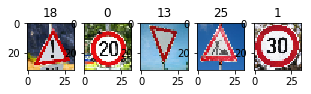

In [24]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import numpy as np
import matplotlib.pyplot as plt
import cv2

import glob
import matplotlib.image as mpimg
from os.path import basename

images = np.zeros((5,32,32,3), dtype='uint8')
labels = np.zeros((5,), dtype='uint8')

i = 0
plt.figure(figsize=(10,10))
for filename in glob.glob('examples/test/*.jpg'):
    labels[i] = basename(filename).split('.')[0]
    orig_image = mpimg.imread(filename)
    image = cv2.resize(orig_image, (32, 32))
    images[i,...] = image
    plt.subplot(1, 10, i + 1)
    plt.title('{}'.format(labels[i]))
    plt.imshow(images[i].squeeze())
    i += 1

### Predict the Sign Type for Each Image

In [25]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Pre-processing
images = rgb2gray(images)
images = normalize_quick(images)



In [26]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

import tensorflow as tf

# Predictions
with tf.Session() as sess:
    # Load the model
    saver.restore(sess, './lenet')
    # Evaluate on the test data
    images_accuracy = evaluate(images, labels)
    # Print the test accuracy
    print("Accuracy on test images = {:.3f}".format(images_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Accuracy on test images = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [27]:
import csv

signnamesfile = open('signnames.csv')
# Skip the header
next(signnamesfile)

reader = csv.reader(signnamesfile)
signnames = {}
for row in reader:
    key = int(row[0])
    signnames[key] = row[1:]


INFO:tensorflow:Restoring parameters from ./lenet
0. image label: 18   - ['General caution']
   top5: 
          18 - 100.00% ['General caution']
          26 -   0.00% ['Traffic signals']
          27 -   0.00% ['Pedestrians']
          24 -   0.00% ['Road narrows on the right']
          28 -   0.00% ['Children crossing']


1. image label: 0    - ['Speed limit (20km/h)']
   top5: 
           0 - 100.00% ['Speed limit (20km/h)']
           3 -   0.00% ['Speed limit (60km/h)']
          14 -   0.00% ['Stop']
           8 -   0.00% ['Speed limit (120km/h)']
           1 -   0.00% ['Speed limit (30km/h)']


2. image label: 13   - ['Yield']
   top5: 
          13 -  99.19% ['Yield']
          15 -   0.30% ['No vehicles']
          26 -   0.22% ['Traffic signals']
          29 -   0.21% ['Bicycles crossing']
          22 -   0.05% ['Bumpy road']


3. image label: 25   - ['Road work']
   top5: 
          25 -  90.23% ['Road work']
          24 -   6.17% ['Road narrows on the right']
       

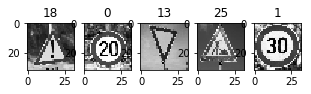

In [28]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    top5 = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: images, y: labels, keep_prob: 1.0})
    plt.figure(figsize=(10,10))
    for i in range(len(images)):
        plt.subplot(1, 10, i + 1)
        plt.title('{}'.format(labels[i]))
        plt.imshow(images[i].squeeze(), cmap='gray')
        print('{}. image label: {:<3}  - {}'.format(i, labels[i], signnames[labels[i]]))
        print('   top5: ')
        for j in range(5):
            print('         {:>3} - {:6.2f}% {}'.format(top5.indices[i][j], top5.values[i][j]*100, signnames[top5.indices[i][j]]))
        print('\n')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [29]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")